# Limpeza de Dados

Os processos de limpeza e preparação de dados são muito importantes. Dados limpos, completos e organizados tornam as análises mais fáceis e confiáveis. Abaixo descrevemos alguns dos principais mecanismos para tratar dados que tenham algum problema.

Execute cada célula de código abaixo para ver o resultado.

## Leitura e análise inicial dos dados


In [2]:
#importação de bibliotecas
import pandas as pd

%matplotlib inline

In [4]:
# lê o arquivo CSV

df = pd.read_csv('C:/Users/Felipe Oliveira/Desktop/app002/Data_Cience/dataset/Video_Games_Sales_as_at_22_Dec_2016.csv')

O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [7]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


O método `info` é útil para vermos quais colunas do DataFrame tiveram seus tipos de dados corretamente identificados pelo Pandas. No caso abaixo já é possível identificar alguns problemas. As colunas *quartos, suite, area, aluguel e condomínio* foram interpretadas como objetos genéricos enquanto deveriam ser numéricas. A coluna *data* deveria ser do tipo `datetype`.

O método `info` também nos informa quantos valores cada coluna tem. Veja abaixo que a coluna *endereço* tem apenas 19 valores.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Localizando e tratando valores inválidos

Uma forma prática de identificar potenciais problemas é exibir todas as linhas com valores em branco (*NaN*). Abaixo podemos verificar que uma das linhas não tem o valor para a coluna *endereco*.

In [8]:
df[df.isna().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Podemos usar o método `fillna` para substituir os valores em branco por um valor definido, neste caso a *String* "Desconhecido". Após a substituição não há mais linhas com valores em branco.

In [32]:
df['Rating'] = df['Rating'].fillna("Desconhecido")

df[df.isna().any(axis=1)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16719 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16719 non-null  object 
 3   Genre            16719 non-null  object 
 4   Publisher        16719 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     16719 non-null  object 
 11  Critic_Count     16719 non-null  object 
 12  User_Score       16719 non-null  object 
 13  User_Count       16719 non-null  object 
 14  Developer        16719 non-null  object 
 15  Rating           16719 non-null  object 
dtypes: float64(5), object(11)
memory usage: 2.0+ MB


Podemos também fazer substituições de partes das *strings* no DataFrame. Por exemplo, podemos padronizar nomes com as abreviações GAME BOY para GB. O código abaixo faz isto:

In [38]:
df['Platform'] = df['Platform'].str.replace('Game boy', 'GB')


df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido


Ainda não sabemos por que diversas colunas numéricas foram identificadas com o tipo genérico *objeject*. Uma forma de averiguar é listar todos os valores não repetidos de uma coluna. O método `unique` é útil neste caso. Abaixo podemos ver que a coluna *Name* contém uma ou mais interrogações (?) entre os valores.

In [39]:
df['Name'].unique()

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0,
       'Desconhecido', 1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0,
       2020.0, 2017.0], dtype=object)

Vamos então exibir todas as linhas com "Desconhecido" em alguma coluna. O comando abaixo identificou que as linhas de índice 659 e 14246 contém vários valores representados com uma Desconhecidos.

In [45]:
df[df['Name'] == 'Desconhecido']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,Desconhecido,GEN,1993.0,Desconhecido,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
14246,Desconhecido,GEN,1993.0,Desconhecido,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido


Como a linha identificada acima tem muitos valores inválidos, podemos decidir retirá-la do DataFrame. Para isso, usamos o método `drop`. Perceba que a linha não aparece mais no DataFrame.

In [46]:
# para deleção da linha basta passar o índice
#df = df.drop(19)

#df.dropna()
#df.dropna(how='all')
#df.dropna(subset=['name', 'toy'])
#df.dropna(inplace=True)
df.drop(659, inplace=True)
df.drop(14246, inplace=True)

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido


Também podemos remover uma coluna inteira com o comando (tips.drop), com isso vamos remover colunas com muitos valores "Desconhecidos".

In [72]:
#Localizando colunas com muitos valores Desconhecidos:

#df[df['Year_of_Release'] == 'Desconhecido']
#df[df['Publisher'] == 'Desconhecido']
#df[df['Critic_Score'] == 'Desconhecido']
#df[df['User_Count'] == 'Desconhecido']

#Removendo colunas com muitos valores Desconhecidos:

df_2 = df.drop(columns=['Year_of_Release', 'Publisher','Critic_Count','Critic_Count','User_Score','User_Score',
'Developer','Rating','Critic_Score','User_Count' ])


#df_2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido


Como já vimos anteriormente, podemos criar uma coluna com o total do aluguel somado com o condomínio. Vamos calcular novamente.

In [11]:
df['soma_total'] = df['aluguel'] + df['condominio']
df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,soma_total
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17,900371
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17,650428
2,6784,Rua Jose Loureiro,2,0,81,0,1100,1100,23/08/17,11001100
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17,1350300
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17,1300300
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17,900410
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17,1100382
7,469,Desconhecido,1,0,30,0,550,210,03/07/17,550210
8,24,R. Desembargador Westphalen,1,0,60,1,800,120,30/09/17,800120
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17,1800520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      19 non-null     int64 
 1   endereco    19 non-null     object
 2   quartos     19 non-null     int64 
 3   suite       19 non-null     object
 4   area        19 non-null     object
 5   vaga        19 non-null     int64 
 6   aluguel     19 non-null     object
 7   condominio  19 non-null     object
 8   data        19 non-null     object
 9   soma_total  19 non-null     object
dtypes: int64(3), object(7)
memory usage: 1.6+ KB


Para renomear as colunas podemos utilizar o método `rename` conforme bloco abaixo.

In [12]:
df = df.rename(columns={'soma_total': 'total'})
df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data,total
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17,900371
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17,650428
2,6784,Rua Jose Loureiro,2,0,81,0,1100,1100,23/08/17,11001100
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17,1350300
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17,1300300
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17,900410
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17,1100382
7,469,Desconhecido,1,0,30,0,550,210,03/07/17,550210
8,24,R. Desembargador Westphalen,1,0,60,1,800,120,30/09/17,800120
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17,1800520


Após efetiuramos as análises e se não vamos mais precisar da coluna podemos remover a coluna utiliza o comando `drop`

In [13]:
# Para deleção de uma coluna basta passar por parametro quais colunas deseja deletar
df = df.drop(columns=['total'])

# df.drop(columns=['total'], inplace=True)
df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900,371,11/10/17
1,167,Rua Jose Loureiro,2,0,64,0,650,428,15/07/17
2,6784,Rua Jose Loureiro,2,0,81,0,1100,1100,23/08/17
3,82,Rua Lourenço Pinto,2,0,50,0,1350,300,19/09/17
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,05/08/17
5,34197,Alameda Doutor Muricy,2,0,80,1,900,410,23/10/17
6,5072,Alameda Doutor Muricy,2,0,84,0,1100,382,02/09/17
7,469,Desconhecido,1,0,30,0,550,210,03/07/17
8,24,R. Desembargador Westphalen,1,0,60,1,800,120,30/09/17
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800,520,12/10/17


## Conversão de tipos

Como pode ser visto pela execução do método `info` abaixo, as colunas ainda possuem tipos incorretos. Precisamos então fazer a conversão manual dos tipos.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      19 non-null     int64 
 1   endereco    19 non-null     object
 2   quartos     19 non-null     int64 
 3   suite       19 non-null     object
 4   area        19 non-null     object
 5   vaga        19 non-null     int64 
 6   aluguel     19 non-null     object
 7   condominio  19 non-null     object
 8   data        19 non-null     object
dtypes: int64(3), object(6)
memory usage: 1.5+ KB


Para converter as colunas para os tipos adequados, usamos o método `astype`. Podemos tanto aplicar a uma coluna por vez ou em várias colunas representadas por um dicionário. O código abaixo exemplifica as duas abordagens:

In [19]:
df['suite'] = df['suite'].astype(int)

df = df.astype({'area': int, 'aluguel': float, 'condominio': float})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo      19 non-null     int64  
 1   endereco    19 non-null     object 
 2   quartos     19 non-null     int64  
 3   suite       19 non-null     int64  
 4   area        19 non-null     int64  
 5   vaga        19 non-null     int64  
 6   aluguel     19 non-null     float64
 7   condominio  19 non-null     float64
 8   data        19 non-null     object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.5+ KB


Para uma coluna com datas, precisamos usar um comando diferente, o `to_datetime`. Ao executar o comando abaixo obtemos um erro informando que há um valor de data contendo 'janeiro 17', que não pode ser interpretado pelo método.

In [15]:
df['data'] = pd.to_datetime(df['data'])

ParserError: ignored

Abaixo substituimos o valor com problema e com isso conseguimos converter corretamente a coluna.

In [16]:
df['data'] = df['data'].str.replace('janeiro 17', '01/01/17')

df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')

#Casos em datas com diferentes formatos podem ser trabalhados com o format
# format='%Y%m%d' = '20210305'
# format='%d%m%Y' = '05032021'
# format='%d-%b-%Y' = '05-Mar-2021'

Agora podemos conferir os tipos e verificar que estão todos corretos:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   codigo      19 non-null     int64         
 1   endereco    19 non-null     object        
 2   quartos     19 non-null     int64         
 3   suite       19 non-null     object        
 4   area        19 non-null     object        
 5   vaga        19 non-null     int64         
 6   aluguel     19 non-null     object        
 7   condominio  19 non-null     object        
 8   data        19 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.5+ KB


Com todos os tipos convertidos corretamente, podemos aplicar funções estatísticas e exibir corretamente os valores em gráficos como mostrado abaixo:

Média do aluguel:  895.2631578947369


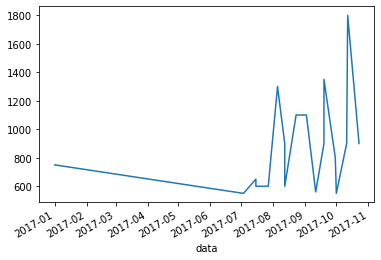

In [20]:
print('Média do aluguel: ', df['aluguel'].mean())

df.set_index('data')['aluguel'].plot()

In [21]:
df

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
0,34,Rua Desembargador Westphalen,2,0,90,0,900.0,371.0,2017-10-11
1,167,Rua Jose Loureiro,2,0,64,0,650.0,428.0,2017-07-15
2,6784,Rua Jose Loureiro,2,0,81,0,1100.0,1100.0,2017-08-23
3,82,Rua Lourenço Pinto,2,0,50,0,1350.0,300.0,2017-09-19
4,2970,Rua Lourenço Pinto,2,0,63,0,1300.0,300.0,2017-08-05
5,34197,Alameda Doutor Muricy,2,0,80,1,900.0,410.0,2017-10-23
6,5072,Alameda Doutor Muricy,2,0,84,0,1100.0,382.0,2017-09-02
7,469,Desconhecido,1,0,30,0,550.0,210.0,2017-07-03
8,24,R. Desembargador Westphalen,1,0,60,1,800.0,120.0,2017-09-30
9,74,Avenida Visconde de Guarapuava,2,1,132,1,1800.0,520.0,2017-10-12


## Escrevendo os dados limpos no disco

Para salvar os dados limpos em um arquivo, usamos o método `to_csv`, como no exemplo abaixo:

In [22]:
df.to_csv('/content/drive/MyDrive/UP/Ciência de Dados/Notebooks/data/aluguel-limpo-aula3.csv', index=False)